<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/Python/07_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第7章 サポートベクトルマシン

## 7.1 マージンを最大とする識別面を求める

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.svm import SVC

乱数を使って、データを生成
* 2クラス
* 特徴ベクトルは2次元（冗長な次元はなし）
* 各クラスにつき一つの正規分布からデータを生成
* ランダムにクラスを反転させることは行わない
* クラスが適度に分かれているように調整

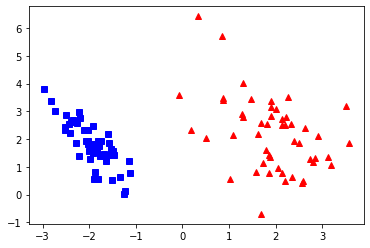

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=2.0, random_state=2)
plt.plot(X[y==0,0], X[y==0,1],"bs")
plt.plot(X[y==1,0], X[y==1,1],"r^")

線形カーネル(linear)は、この特徴空間でマージン最大化を行うものです。

In [3]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

識別面を表示します。各クラスのサポートベクトルと識別面の距離が等しくなっているのがわかります。

<AxesSubplot:>

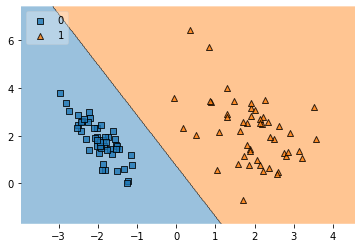

In [4]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

## 7.2 ソフトマージンによる誤識別データの吸収

クラスの分離度(class_sep)の値を少し小さくして、やや難しいデータを作成し、同様の手順でSVMによる識別を行います。線型分離不可能なデータなので、スラック変数の重み$C$を引数で与えます。

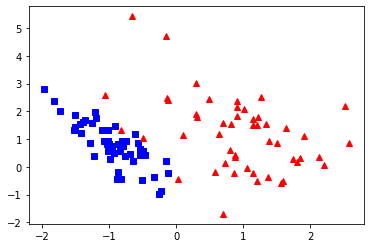

In [5]:
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=1.0, random_state=2)
plt.plot(X[y==0,0], X[y==0,1],"bs")
plt.plot(X[y==1,0], X[y==1,1],"r^")

In [6]:
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

SVC(C=1, kernel='linear')

<AxesSubplot:>

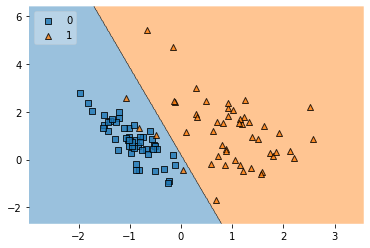

In [7]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

## 7.3 カーネル関数を用いたSVM

非線形識別面での識別を行うので、さらにデータを複雑なものにします。

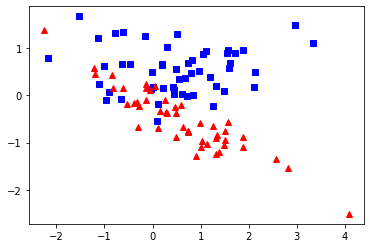

In [8]:
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=3)
plt.plot(X[y==0,0], X[y==0,1],"bs")
plt.plot(X[y==1,0], X[y==1,1],"r^")

多項式カーネル

In [9]:
clf = SVC(kernel='poly', degree=3, C=1)
clf.fit(X, y)

SVC(C=1, kernel='poly')

<AxesSubplot:>

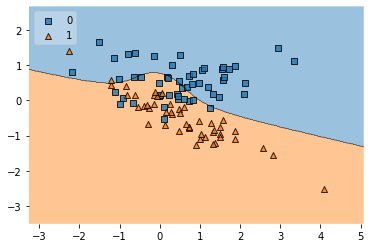

In [10]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

RBFカーネル

In [11]:
clf = SVC(kernel='rbf', gamma=1, C=1)
clf.fit(X, y)

SVC(C=1, gamma=1)

<AxesSubplot:>

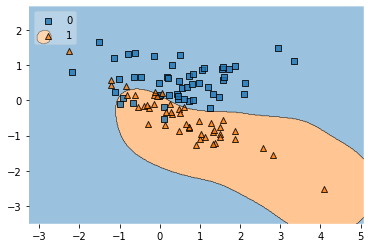

In [12]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

## 7.4 ハイパーパラメータのグリッドサーチ

In [13]:
from sklearn.model_selection import GridSearchCV

「スラック変数の重みC」と「多項式カーネルの次数degree」の組み合わせでGridSearchを行います。

パラメータとして多項式カーネルを与えて、サポートベクトルマシン[SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)のインスタンスsvcを作成します。

In [14]:
svc = SVC(kernel='poly')
svc

SVC(kernel='poly')

GridSearchを行います。「スラック変数の重みC」と「多項式カーネルの次数degree」の組み合わせで、リストを値とするディクショナリの配列param\_gridを作成します。

In [15]:
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'degree': [1,2,3]}
 ]

識別器のインスタンスを第1引数、グリッドを第2引数として、[GridSearch](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)のインスタンスを作成し、fitメソッドを実行します。パラメータcvの値がNone（デフォルト）のとき、性能は5-fold CVで評価されます。許容できる実行時間を考えて、この値を調整します。

In [16]:
clf = GridSearchCV(svc, param_grid, cv=3)
clf.fit(X, y)                            

GridSearchCV(cv=3, estimator=SVC(kernel='poly'),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 2, 3]}])

結果はcv\_results\_属性の値として、辞書型で得られます。また、容易にpandasのDataFrame型に変換できます。

In [17]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001336,0.000474,0.000336,0.000475,0.1,1,"{'C': 0.1, 'degree': 1}",0.823529,0.848485,0.787879,0.819964,0.024870,6
1,0.001331,0.000473,0.000667,0.000472,0.1,2,"{'C': 0.1, 'degree': 2}",0.705882,0.666667,0.696970,0.689840,0.016785,15
2,0.001327,0.000463,0.000000,0.000000,0.1,3,"{'C': 0.1, 'degree': 3}",0.882353,0.696970,0.727273,0.768865,0.081196,11
3,0.000667,0.000471,0.000668,0.000472,1,1,"{'C': 1, 'degree': 1}",0.911765,0.848485,0.787879,0.849376,0.050580,4
4,0.000665,0.000470,0.000333,0.000471,1,2,"{'C': 1, 'degree': 2}",0.764706,0.787879,0.696970,0.749851,0.038571,13
5,0.001001,0.000011,0.000334,0.000472,1,3,"{'C': 1, 'degree': 3}",0.823529,0.848485,0.787879,0.819964,0.024870,6
6,0.000667,0.000472,0.000000,0.000000,10,1,"{'C': 10, 'degree': 1}",0.970588,0.878788,0.818182,0.889186,0.062653,1
7,0.000996,0.000006,0.000000,0.000000,10,2,"{'C': 10, 'degree': 2}",0.764706,0.787879,0.696970,0.749851,0.038571,13
8,0.000995,0.000007,0.000334,0.000472,10,3,"{'C': 10, 'degree': 3}",0.764706,0.727273,0.878788,0.790255,0.064440,9
9,0.001000,0.000012,0.000333,0.000471,100,1,"{'C': 100, 'degree': 1}",0.970588,0.878788,0.818182,0.889186,0.062653,1


すべてのパラメータの組み合わせについて、スコアを表示します。

In [18]:
re = clf.cv_results_
for params, mean_score, std_score in zip(re['params'], re['mean_test_score'], re['std_test_score']):
    print(f"{mean_score:.3f} (+/- {std_score*2:.3f}) for {params}")

0.820 (+/- 0.050) for {'C': 0.1, 'degree': 1}
0.690 (+/- 0.034) for {'C': 0.1, 'degree': 2}
0.769 (+/- 0.162) for {'C': 0.1, 'degree': 3}
0.849 (+/- 0.101) for {'C': 1, 'degree': 1}
0.750 (+/- 0.077) for {'C': 1, 'degree': 2}
0.820 (+/- 0.050) for {'C': 1, 'degree': 3}
0.889 (+/- 0.125) for {'C': 10, 'degree': 1}
0.750 (+/- 0.077) for {'C': 10, 'degree': 2}
0.790 (+/- 0.129) for {'C': 10, 'degree': 3}
0.889 (+/- 0.125) for {'C': 100, 'degree': 1}
0.780 (+/- 0.077) for {'C': 100, 'degree': 2}
0.820 (+/- 0.083) for {'C': 100, 'degree': 3}
0.889 (+/- 0.125) for {'C': 1000, 'degree': 1}
0.760 (+/- 0.055) for {'C': 1000, 'degree': 2}
0.810 (+/- 0.023) for {'C': 1000, 'degree': 3}


性能が最大となるパラメータとそのときのスコアを表示します。

In [19]:
clf.best_params_

{'C': 10, 'degree': 1}

In [20]:
clf.best_score_

0.8891859774212715

## 課題

GridSearchCV でscikit-learn付属の wine データに対する多項式カーネルサポートベクトルマシン(SVC) 識別の最適なハイパーパラメータ(Cとdegree)の組み合わせを求めてください。余裕があれば、多項式カーネル以外にRBFカーネルも探索の対象として最適なパラメータの組み合わせを求めてください。